In [1]:
import sys
sys.path.append('/home/hamid/Downloads/EnsembleTools/')

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from dpet.featurization.distances import calc_ca_dmap
from dpet.analysis import EnsembleAnalysis , FeaturizationOutput
from dpet.visualization.plot import *
from dpet.featurization.angles import *
from dpet.featurization.distances import *
from dpet.logger import stream as st

In [3]:
# Codes.
ens_codes = [
    "3a1g_B_prod_R1_fit",
    "3a1g_B_prod_R2_fit",
    "3a1g_B_prod_R3_fit"
]

# Instantiate the pipeline object.
pipeline = EnsembleAnalysis()

# Load some data.
data_dp = "/home/hamid/Downloads/EnsembleTools/ensemble_files/3a1g_B"
pipeline.load_ensembles(
    input_dp=data_dp,
    codes=ens_codes,
    format="traj",
    topology_fp= os.path.join(data_dp, "3a1g_B.pdb"),  # Not needed when format="pdb".
    ext="xtc"
)

st.write("Loaded ensembles with the following codes:", pipeline.codes)

Loading data for 3a1g_B_prod_R1_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R2_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R3_fit.
Found 200 conformations.
Loaded ensembles with the following codes: ['3a1g_B_prod_R1_fit', '3a1g_B_prod_R2_fit', '3a1g_B_prod_R3_fit']


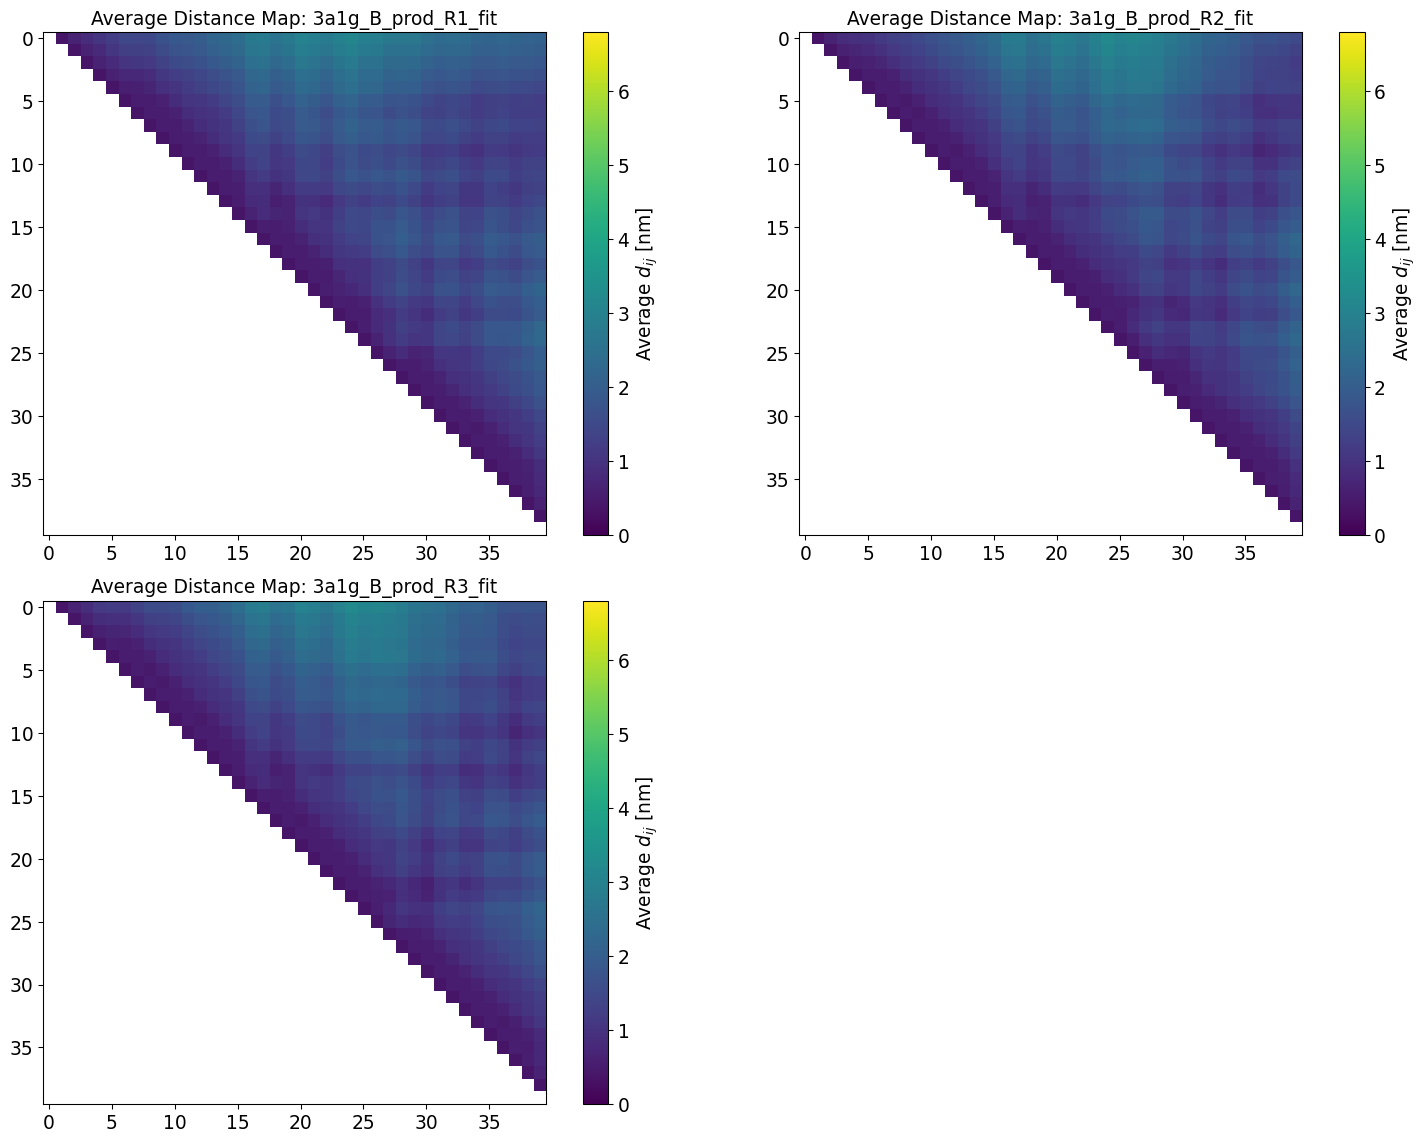

In [4]:
plot_average_dmap(pipeline.trajectories)

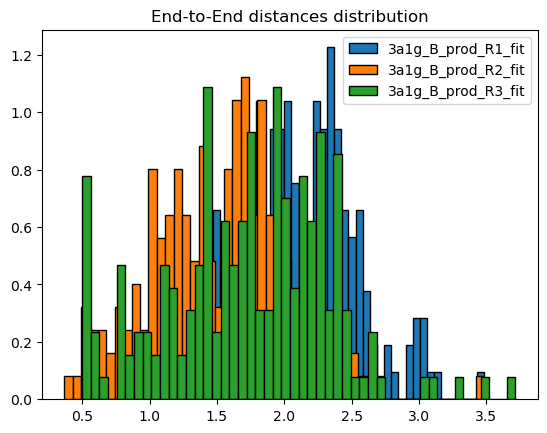

In [5]:
end_to_end_distances_plot(pipeline.trajectories, bins=50)

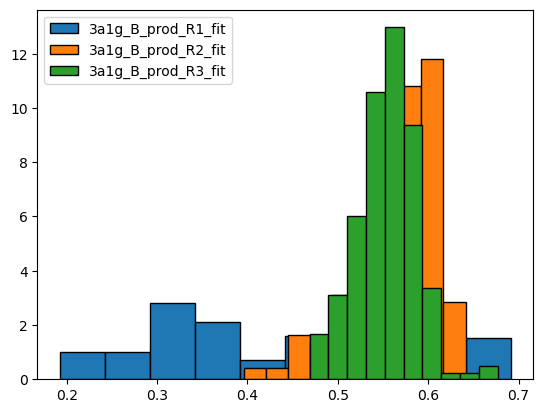

In [6]:
plot_asphericity_dist(pipeline.trajectories, bins=10)

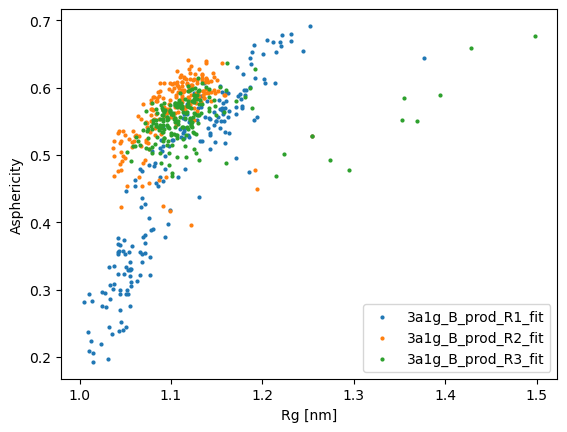

In [7]:
plot_rg_vs_asphericity(pipeline.trajectories)

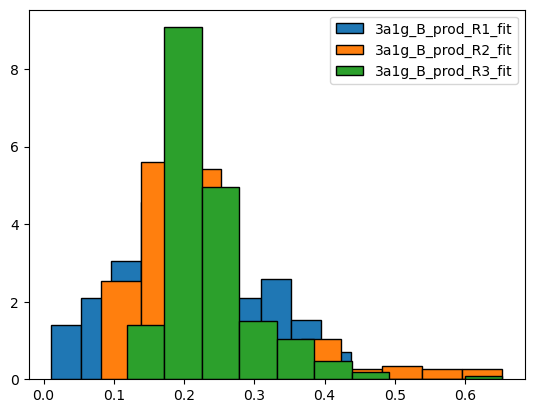

In [8]:
plot_prolateness_dist(pipeline.trajectories, bins=10)

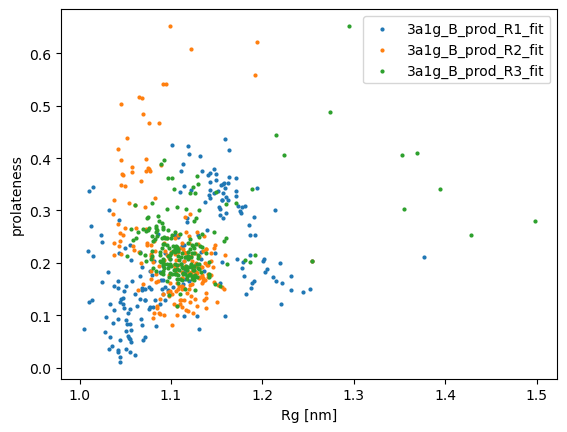

In [9]:
plot_rg_vs_prolateness(pipeline.trajectories)

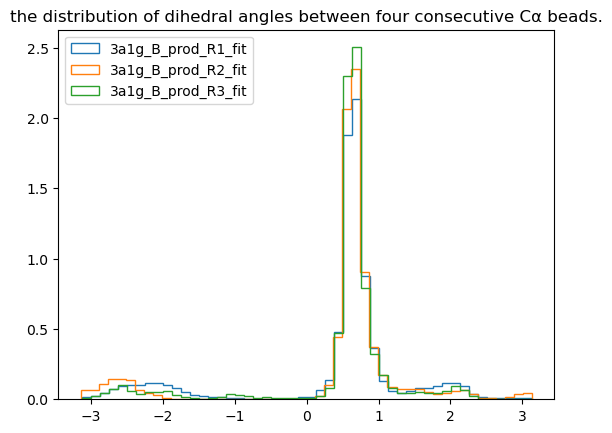

In [10]:
plot_alpha_angles_dist(pipeline.trajectories)

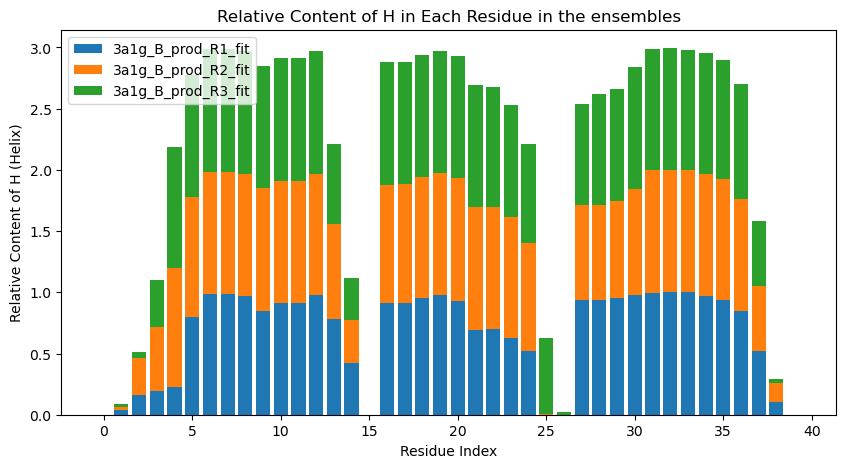

In [11]:
plot_relative_helix_content(pipeline.trajectories)

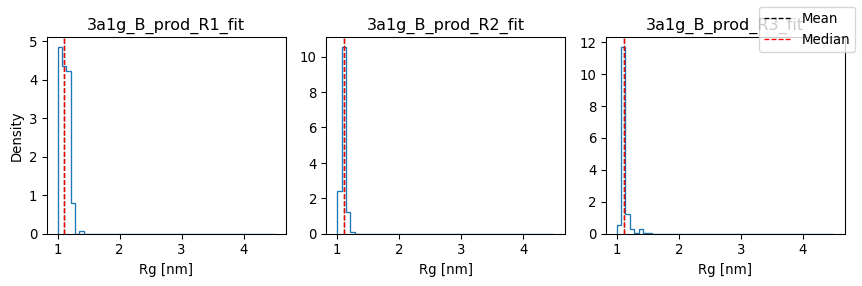

In [12]:
plot_rg_comparison(pipeline.trajectories)

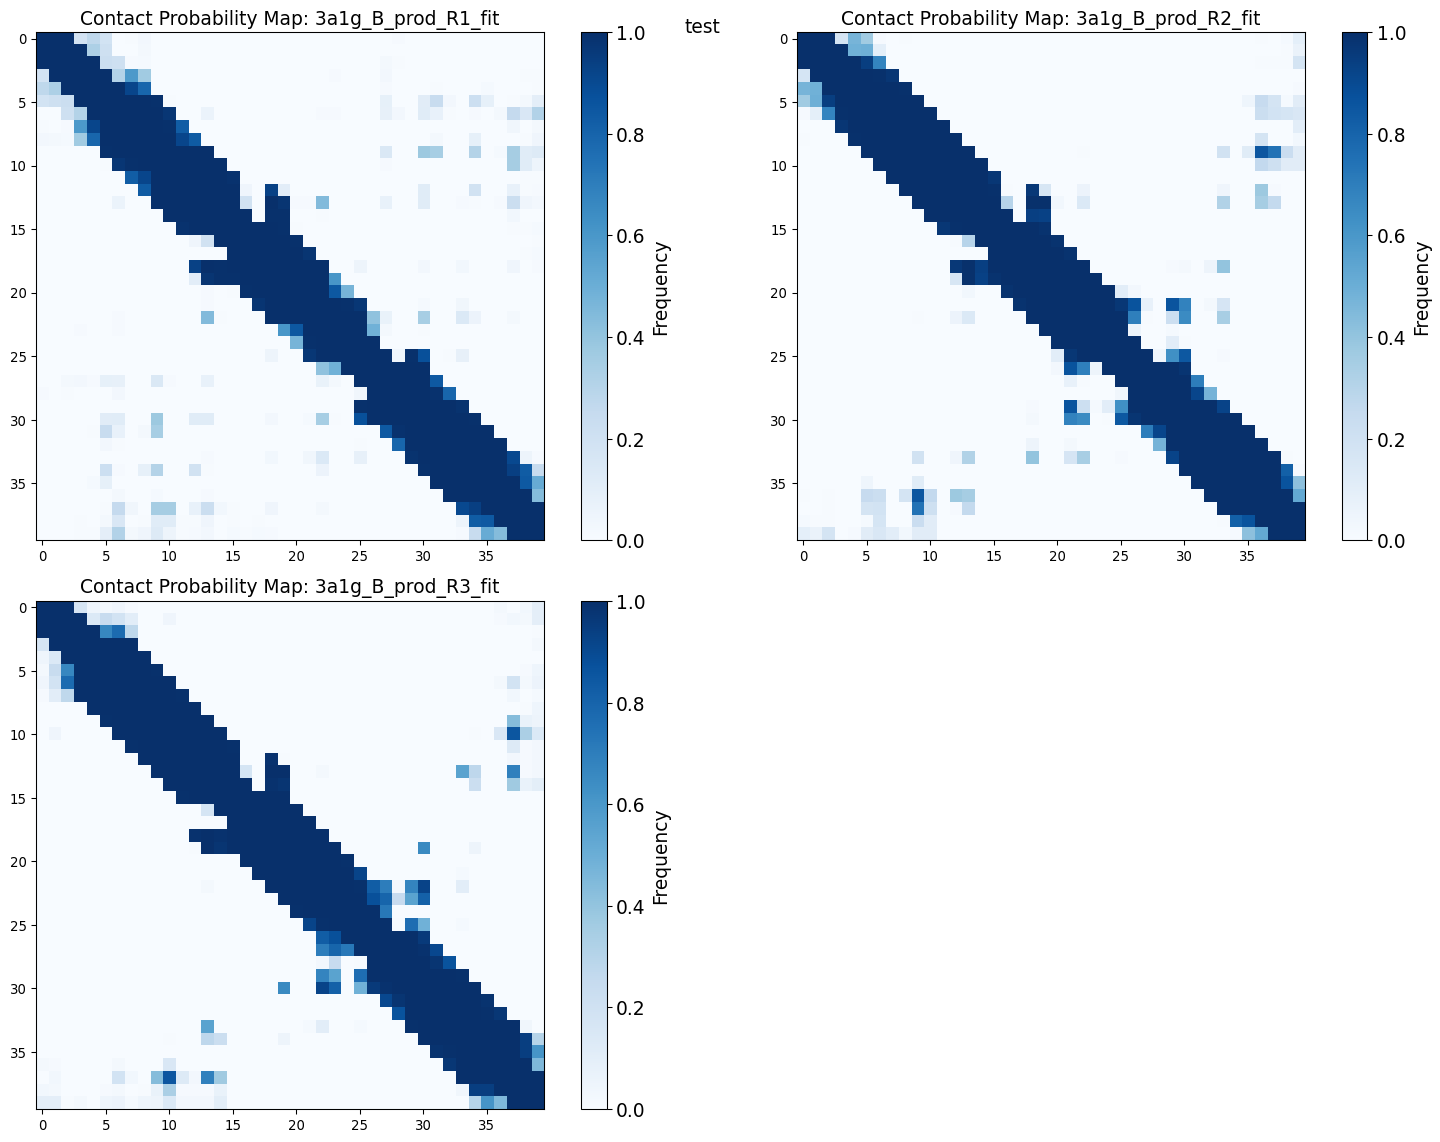

In [19]:
plot_contact_prob(pipeline.trajectories, title="test", threshold=0.8)